In [1]:
import optuna

# You can use Matplotlib instead of Plotly for visualization by simply replacing `optuna.visualization` with
# `optuna.visualization.matplotlib` in the following examples.
from optuna.visualization.matplotlib import plot_contour
from optuna.visualization.matplotlib import plot_edf
from optuna.visualization.matplotlib import plot_intermediate_values
from optuna.visualization.matplotlib import plot_optimization_history
from optuna.visualization.matplotlib import plot_parallel_coordinate
from optuna.visualization.matplotlib import plot_param_importances
from optuna.visualization.matplotlib import plot_slice


In [2]:
pwd

'/lus/grand/projects/STlearn/4D_fMRI_Transformer/notebooks'

In [3]:
cd ..

/lus/grand/projects/STlearn/4D_fMRI_Transformer


In [4]:
# optuna_simplecnn_sex_bb_20220909
# optuna_simplecnn_ADHD_ab_20220910
study_name = 'mobilenetv3_from_scratch_split_1_optuna_v2'
storage=optuna.storages.RDBStorage(
        url="sqlite:///{}.db".format(study_name),
        engine_kwargs={ "connect_args": {"timeout": 10}},
        skip_compatibility_check=True
        )
# study = optuna.create_study(study_name = 'optuna_simplecnn_ADHD_ab_20220910', 
#                                 sampler = optuna.samplers.RandomSampler(), #하이퍼 파라미터를 샘플링하는 방법
#                                 pruner = optuna.pruners.MedianPruner(n_startup_trials=0, n_warmup_steps=0, interval_steps=1),
#                                 storage = storage,                                
#                                 load_if_exists = True,
#                                 direction = 'maximize')
is_classification=True
study = optuna.create_study(study_name=study_name, pruner = optuna.pruners.MedianPruner(n_startup_trials=10, n_warmup_steps=3, interval_steps=1) ,storage=storage, load_if_exists=True, direction='maximize' if is_classification else 'minimize') 

df = study.trials_dataframe(attrs=("number", "value", "params", "state"))

[I 2022-11-21 16:20:05,341] Using an existing study with name 'mobilenetv3_from_scratch_split_1_optuna_v2' instead of creating a new one.


In [5]:
print(f"Sampler is {study.sampler.__class__.__name__}")

Sampler is TPESampler


In [6]:
df.loc[df.state=='COMPLETE',:]

,number,value,params_batch_size,params_gamma,params_learning_rate,params_sequence_length,params_transformer_hidden_layers,params_transformer_num_attention_heads,params_weight_decay,state
0,0,0.578210,16.0,0.014219,0.000001,20,16.0,8.0,0.001784,COMPLETE
1,1,0.463390,12.0,0.628883,0.000049,20,16.0,16.0,0.000254,COMPLETE
2,2,0.487022,16.0,0.641231,0.000539,20,8.0,16.0,0.003895,COMPLETE
3,3,0.505918,16.0,0.203780,0.000001,20,8.0,16.0,0.000013,COMPLETE
4,4,0.535082,4.0,0.252301,0.000002,20,16.0,16.0,0.005742,COMPLETE
5,5,0.505860,16.0,0.292493,0.000979,20,8.0,16.0,0.000387,COMPLETE
6,6,0.439464,16.0,0.133438,0.000016,10,8.0,16.0,0.000920,COMPLETE
7,7,0.517869,16.0,0.207099,0.000010,10,8.0,16.0,0.000028,COMPLETE
8,8,0.423908,4.0,0.072264,0.000249,10,8.0,16.0,0.000079,COMPLETE
9,9,0.355806,8.0,0.553524,0.000150,20,8.0,16.0,0.000247,COMPLETE


In [ ]:
#pruned_trials

In [7]:
pruned_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED]
complete_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE]

print("Study statistics: ")
print("   Number of finished trials: ", len(study.trials))
print("   Number of pruned trials: ", len(pruned_trials))
print("   Number of complete trials: ", len(complete_trials))

print('best trial info: {}'.format(study.best_trial))
print('best parameters: {}'.format(study.best_params))
print('best metric: {}'.format(study.best_value))

Study statistics: 
   Number of finished trials:  31
   Number of pruned trials:  0
   Number of complete trials:  29
Best trial:
best trial info: FrozenTrial(number=12, values=[0.6144605654761904], datetime_start=datetime.datetime(2022, 11, 21, 3, 41, 10, 48289), datetime_complete=datetime.datetime(2022, 11, 21, 3, 54, 44, 667091), params={'batch_size': 12, 'gamma': 0.8833190231723455, 'learning_rate': 5.397988161762868e-06, 'sequence_length': 10, 'transformer_hidden_layers': 16, 'transformer_num_attention_heads': 8, 'weight_decay': 0.0013021236508614549}, distributions={'batch_size': IntUniformDistribution(high=16, low=4, step=4), 'gamma': UniformDistribution(high=1.0, low=0.0), 'learning_rate': LogUniformDistribution(high=0.001, low=1e-06), 'sequence_length': CategoricalDistribution(choices=(10, 20)), 'transformer_hidden_layers': CategoricalDistribution(choices=(8, 16)), 'transformer_num_attention_heads': CategoricalDistribution(choices=(8, 16)), 'weight_decay': LogUniformDistributi

### number = Trial의 번호, value= 해당 trial의 반환값 (최종성능), params=사용한 파라미터, intermediate_values = 중간성능값들

/tmp/ipykernel_102553/3324289224.py:1: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  plot_optimization_history(study)


<AxesSubplot:title={'center':'Optimization History Plot'}, xlabel='#Trials', ylabel='Objective Value'>

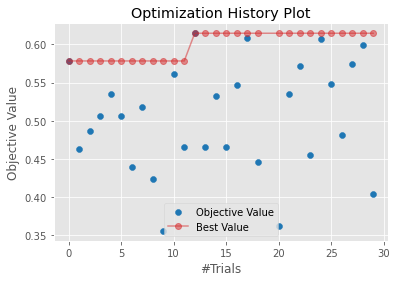

In [8]:
plot_optimization_history(study)

/tmp/ipykernel_102553/3988485508.py:1: ExperimentalWarning: plot_intermediate_values is experimental (supported from v2.2.0). The interface can change in the future.
  plot_intermediate_values(study)


<AxesSubplot:title={'center':'Intermediate Values Plot'}, xlabel='Step', ylabel='Intermediate Value'>

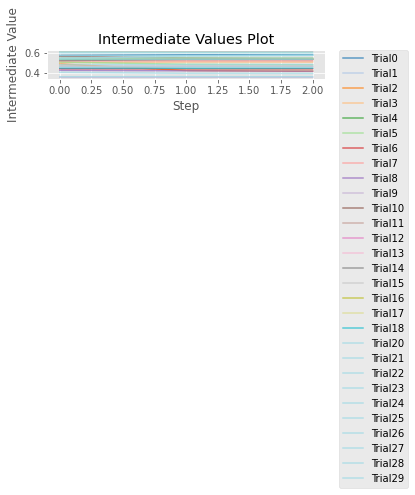

In [9]:
plot_intermediate_values(study)

In [ ]:
plot_parallel_coordinate(study, params=["sequence_length", "transformer_num_attention_heads"])

In [ ]:
plot_contour(study,params=['sequence_length', 'transformer_num_attention_heads'])

In [ ]:
plot_param_importances(study)

In [ ]:
plot_edf(study)